### IMPORT LIBRARY 

In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from plotly.offline import iplot , plot 
from imblearn.over_sampling import SMOTE
from plotly.subplots import make_subplots
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve

### LOAD  DATA 

In [38]:
data=pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")

### EXPLORATION  DATA 

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [40]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [41]:
data.shape

(6819, 96)

In [42]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [43]:
data.sample(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1942,0,0.441964,0.484409,0.495530,0.600283,0.600326,0.999013,0.797245,0.809193,0.303179,...,0.767403,0.001364,0.624590,0.600283,0.837841,0.279171,0.026719,0.564787,1,0.031792
3117,0,0.517477,0.574847,0.561165,0.647617,0.647552,0.999077,0.797631,0.809492,0.303722,...,0.820943,0.002120,0.623823,0.647617,0.841587,0.276985,0.026800,0.565201,1,0.052260
1995,0,0.478136,0.497002,0.514642,0.603230,0.603230,0.998871,0.797211,0.809120,0.303417,...,0.771661,0.001253,0.624039,0.603229,0.837870,0.280946,0.026649,0.564377,1,0.025683
6301,0,0.537074,0.599160,0.587451,0.610127,0.610127,0.999033,0.797678,0.809560,0.303895,...,0.833491,0.001424,0.623750,0.610123,0.842379,0.277044,0.026805,0.565224,1,0.051210
1266,0,0.488227,0.547754,0.540072,0.599821,0.599821,0.999020,0.797389,0.809307,0.303416,...,0.795989,0.005776,0.620412,0.599822,0.840047,0.288896,0.034530,0.569592,1,0.017042


In [44]:
data.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [45]:
data.isna().any()

Bankrupt?                                                   False
 ROA(C) before interest and depreciation before interest    False
 ROA(A) before interest and % after tax                     False
 ROA(B) before interest and depreciation after tax          False
 Operating Gross Margin                                     False
                                                            ...  
 Liability to Equity                                        False
 Degree of Financial Leverage (DFL)                         False
 Interest Coverage Ratio (Interest expense to EBIT)         False
 Net Income Flag                                            False
 Equity to Liability                                        False
Length: 96, dtype: bool

In [46]:
data.duplicated().any()

False

In [47]:
data['Bankrupt?'].unique()

array([1, 0])

### DATA VISUALIZATION

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



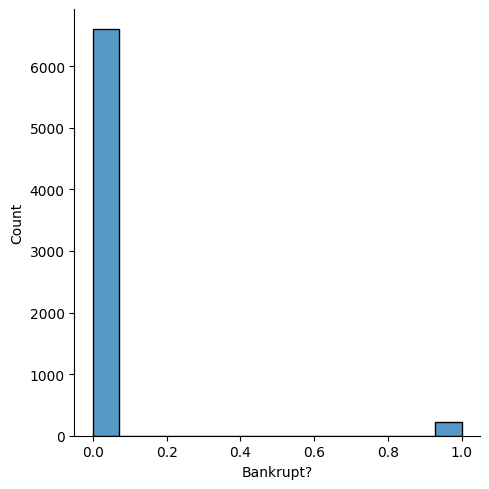

In [48]:
sns.displot(data['Bankrupt?'])

### DATA PREPROCESSING 

In [49]:
x=data.drop('Bankrupt?',axis=1)
y=data['Bankrupt?']

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
encoder_x=LabelEncoder()

In [52]:
for col in x.columns:
    x[col]=encoder_x.fit_transform(x[col])

In [53]:
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,shuffle=True,random_state=42)

In [56]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (9238, 95)
y_train shape =  (9238,)
x_test shape =  (3960, 95)
y_test shape =  (3960,)


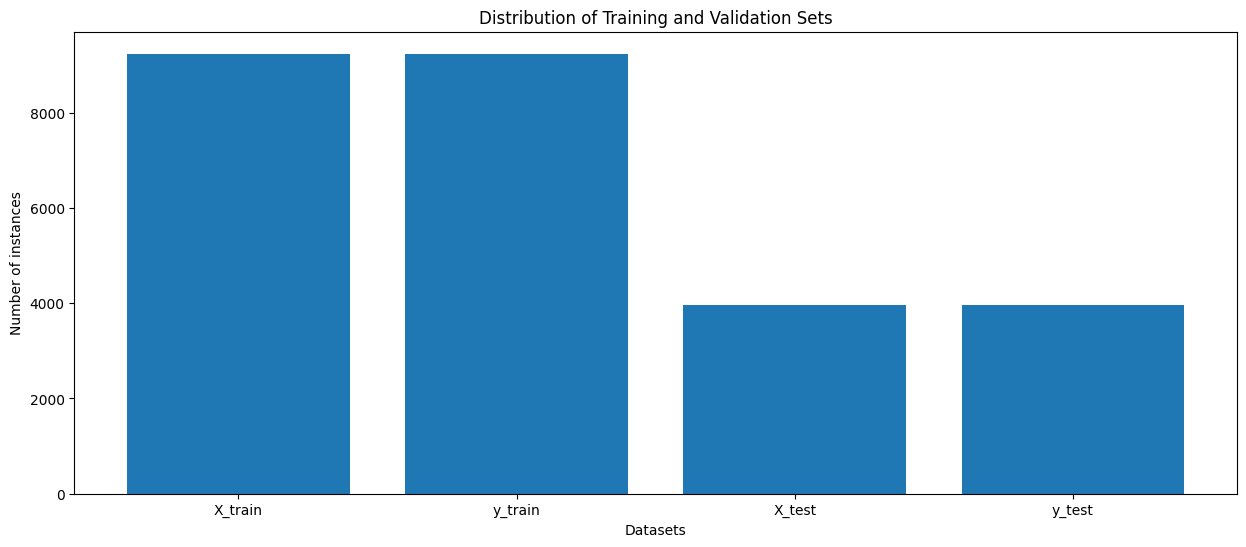

In [57]:
shapes = {
    'X_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': x_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(15, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Datasets')
plt.ylabel('Number of instances')
plt.title('Distribution of Training and Validation Sets')
plt.show()

### SCALING DATA 

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()

In [60]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### LOGICTIC REGRESSION MODEL

In [61]:
from sklearn.linear_model import LogisticRegression


In [62]:
lr_model=LogisticRegression() # call model


In [63]:
lr_model.fit(x_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [64]:
lr_model.score(x_test,y_test)

0.9194444444444444

In [65]:
y_pred=lr_model.predict(x_test)

In [66]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [67]:
from sklearn.metrics import confusion_matrix


In [68]:
 con= confusion_matrix(y_test,y_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis

<Axes: >

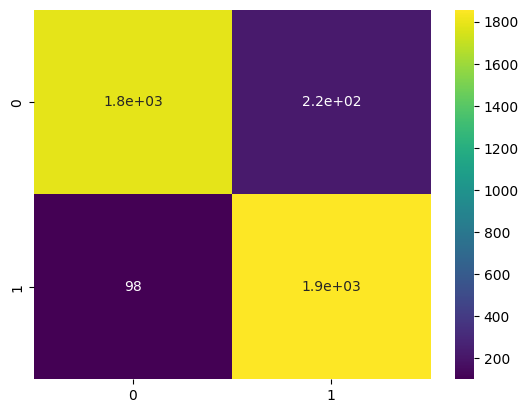

In [69]:
sns.heatmap(con, annot=True, cmap='viridis', cbar=True) # heatmap for Matrix Data Representation

In [70]:
from sklearn.metrics import classification_report # for Precision and Recall Analysis

In [71]:
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9479    0.8898    0.9179      2005
           1     0.8936    0.9499    0.9209      1955

    accuracy                         0.9194      3960
   macro avg     0.9208    0.9198    0.9194      3960
weighted avg     0.9211    0.9194    0.9194      3960



In [74]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9194
Precision: 0.8936
Recall: 0.9499
F1 Score: 0.9209
Specificity: 0.8898
Cohen's Kappa: 0.8390
Matthews Correlation Coefficient (MCC): 0.8406


AUC: 0.9656


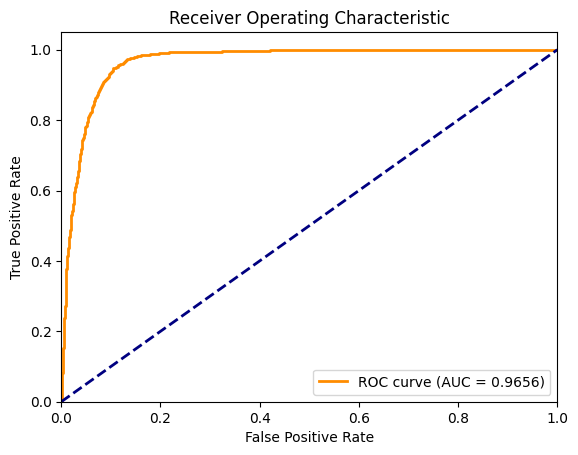

In [78]:
y_pred_proba = lr_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### SVM

In [79]:
from sklearn.svm import SVC

In [89]:
svm_model =SVC(probability=True)

In [90]:
svm_model.fit(x_train, y_train)

SVC(probability=True)

In [91]:
y_pred = svm_model.predict(x_test)


In [83]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [92]:
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     1.0000    0.9636    0.9815      2005
           1     0.9640    1.0000    0.9817      1955

    accuracy                         0.9816      3960
   macro avg     0.9820    0.9818    0.9816      3960
weighted avg     0.9822    0.9816    0.9816      3960



In [93]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9816
Precision: 0.9640
Recall: 1.0000
F1 Score: 0.9817
Specificity: 0.9636
Cohen's Kappa: 0.9631
Matthews Correlation Coefficient (MCC): 0.9638


AUC: 0.9978


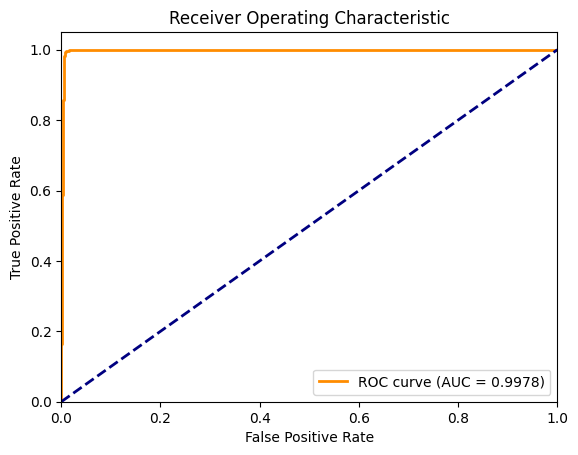

In [94]:
y_pred_proba = svm_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Random Forest**

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
y_pred = rf_model.predict(x_test)

In [97]:
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9944    0.9701    0.9821      2005
           1     0.9701    0.9944    0.9821      1955

    accuracy                         0.9821      3960
   macro avg     0.9822    0.9822    0.9821      3960
weighted avg     0.9824    0.9821    0.9821      3960



In [98]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9821
Precision: 0.9701
Recall: 0.9944
F1 Score: 0.9821
Specificity: 0.9701
Cohen's Kappa: 0.9641
Matthews Correlation Coefficient (MCC): 0.9644


AUC: 0.9984


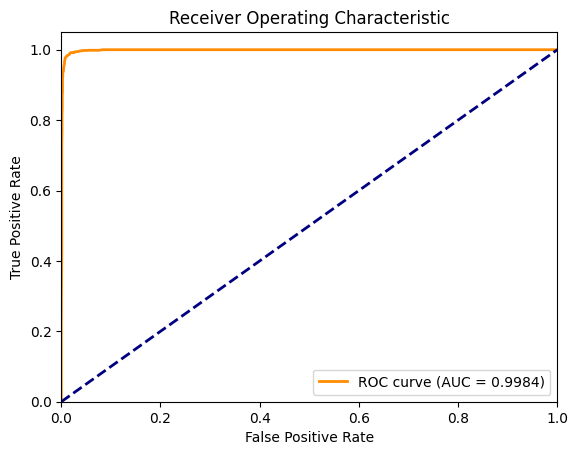

In [106]:
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **XGBOOST**

In [100]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
y_pred = xgb_model.predict(x_test)

In [102]:
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9995    0.9626    0.9807      2005
           1     0.9630    0.9995    0.9809      1955

    accuracy                         0.9808      3960
   macro avg     0.9813    0.9810    0.9808      3960
weighted avg     0.9815    0.9808    0.9808      3960



In [103]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9808
Precision: 0.9630
Recall: 0.9995
F1 Score: 0.9809
Specificity: 0.9626
Cohen's Kappa: 0.9616
Matthews Correlation Coefficient (MCC): 0.9623


AUC: 0.9994


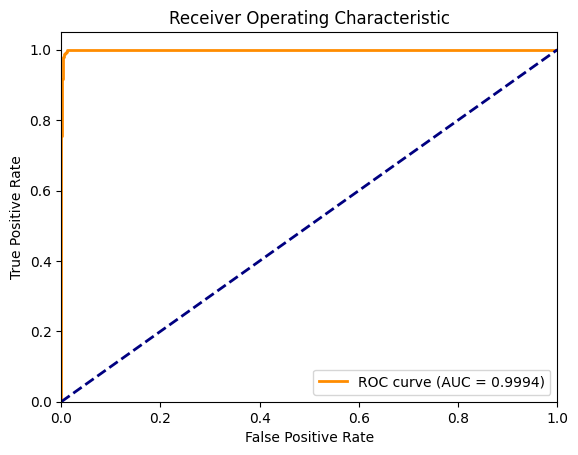

In [105]:
y_pred_proba = xgb_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Catboost**************

In [117]:
import catboost
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=15000,  # Number of boosting iterations
    learning_rate=0.1,  # Learning rate
    depth=6,  # Depth of the trees
    loss_function='Logloss',  # Loss function for binary classification
    eval_metric='AUC',  # Evaluation metric
    cat_features=[]  # List of categorical features (if any)
)
catboost_model.fit(x_train, y_train, verbose=200)  # Train with verbose output every 200 iterations

# Predict on the test set
y_pred = catboost_model.predict(x_test)
y_pred_proba = catboost_model.predict_proba(x_test)[:, 1]  #

0:	total: 25.5ms	remaining: 6m 22s
200:	total: 3.55s	remaining: 4m 21s
400:	total: 7.06s	remaining: 4m 16s
600:	total: 10.4s	remaining: 4m 9s
800:	total: 14.1s	remaining: 4m 9s
1000:	total: 17.4s	remaining: 4m 3s
1200:	total: 20.6s	remaining: 3m 57s
1400:	total: 23.9s	remaining: 3m 51s
1600:	total: 27.1s	remaining: 3m 46s
1800:	total: 30.3s	remaining: 3m 42s
2000:	total: 33.6s	remaining: 3m 38s
2200:	total: 36.9s	remaining: 3m 34s
2400:	total: 40.1s	remaining: 3m 30s
2600:	total: 43.4s	remaining: 3m 26s
2800:	total: 47s	remaining: 3m 24s
3000:	total: 50.3s	remaining: 3m 20s
3200:	total: 53.5s	remaining: 3m 17s
3400:	total: 56.7s	remaining: 3m 13s
3600:	total: 59.9s	remaining: 3m 9s
3800:	total: 1m 3s	remaining: 3m 6s
4000:	total: 1m 6s	remaining: 3m 2s
4200:	total: 1m 9s	remaining: 2m 59s
4400:	total: 1m 13s	remaining: 2m 55s
4600:	total: 1m 16s	remaining: 2m 53s
4800:	total: 1m 20s	remaining: 2m 49s
5000:	total: 1m 23s	remaining: 2m 46s
5200:	total: 1m 26s	remaining: 2m 43s
5400:	tota

In [120]:
y_pred = catboost_model.predict(x_test)

In [121]:
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     1.0000    0.9631    0.9812      2005
           1     0.9635    1.0000    0.9814      1955

    accuracy                         0.9813      3960
   macro avg     0.9818    0.9815    0.9813      3960
weighted avg     0.9820    0.9813    0.9813      3960



In [122]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9813
Precision: 0.9635
Recall: 1.0000
F1 Score: 0.9814
Specificity: 0.9631
Cohen's Kappa: 0.9626
Matthews Correlation Coefficient (MCC): 0.9633


AUC: 0.9988


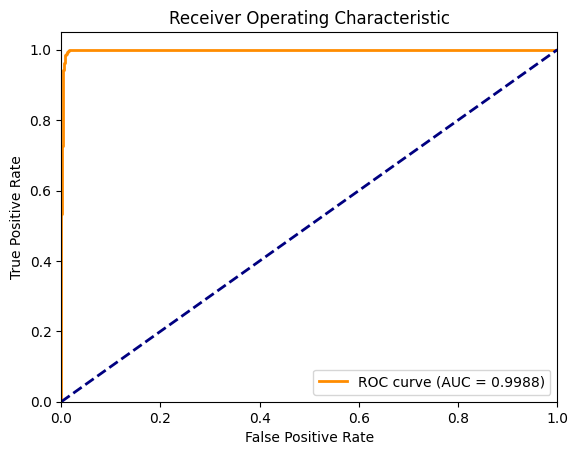

In [123]:
y_pred_proba = catboost_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **LGBMClassifier**

In [124]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    num_leaves=31,         # Number of leaves in one tree
    max_depth=-1,          # Maximum depth of tree (-1 means no limit)
    learning_rate=0.1,     # Learning rate
    n_estimators=100       # Number of boosting iterations
)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 4644, number of negative: 4594
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23718
[LightGBM] [Info] Number of data points in the train set: 9238, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502706 -> initscore=0.010825
[LightGBM] [Info] Start training from score 0.010825


LGBMClassifier()

In [125]:
y_pred = lgb_model.predict(x_test)

In [126]:
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9995    0.9496    0.9739      2005
           1     0.9509    0.9995    0.9746      1955

    accuracy                         0.9742      3960
   macro avg     0.9752    0.9746    0.9742      3960
weighted avg     0.9755    0.9742    0.9742      3960



In [127]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9742
Precision: 0.9509
Recall: 0.9995
F1 Score: 0.9746
Specificity: 0.9496
Cohen's Kappa: 0.9485
Matthews Correlation Coefficient (MCC): 0.9497


AUC: 0.9989


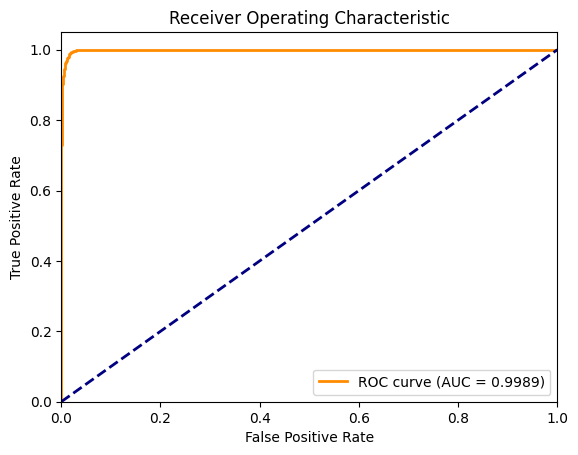

In [129]:
y_pred_proba = lgb_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **KNN**

In [130]:
from sklearn.neighbors import KNeighborsClassifier
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(x_test)

In [131]:
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     1.0000    0.8738    0.9327      2005
           1     0.8854    1.0000    0.9392      1955

    accuracy                         0.9361      3960
   macro avg     0.9427    0.9369    0.9359      3960
weighted avg     0.9434    0.9361    0.9359      3960



In [132]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9361
Precision: 0.8854
Recall: 1.0000
F1 Score: 0.9392
Specificity: 0.8738
Cohen's Kappa: 0.8724
Matthews Correlation Coefficient (MCC): 0.8796


AUC: 0.9798


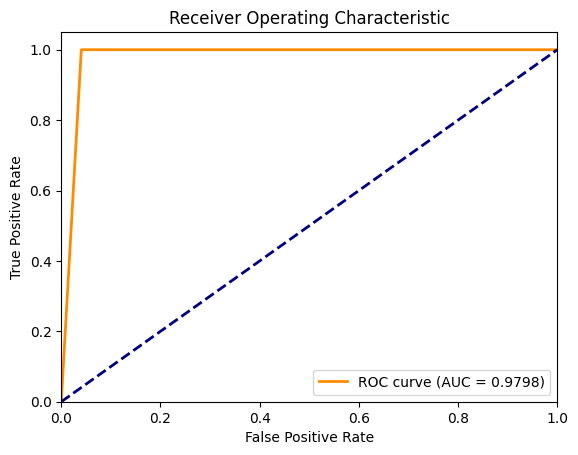

In [134]:
y_pred_proba = knn_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **SGDClassifier**

In [136]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(
    loss='log_loss',            # Log loss (logistic regression)
    penalty='l2',          # L2 regularization
    alpha=0.0001,          # Regularization strength
    max_iter=1000,         # Number of iterations
    random_state=42        # Seed for random number generator
)
sgd_model.fit(x_train, y_train)

# Predict on the test set
y_pred = sgd_model.predict(x_test)

In [137]:
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9325    0.8958    0.9138      2005
           1     0.8972    0.9335    0.9150      1955

    accuracy                         0.9144      3960
   macro avg     0.9149    0.9146    0.9144      3960
weighted avg     0.9151    0.9144    0.9144      3960



In [138]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9144
Precision: 0.8972
Recall: 0.9335
F1 Score: 0.9150
Specificity: 0.8958
Cohen's Kappa: 0.8288
Matthews Correlation Coefficient (MCC): 0.8295


AUC: 0.9641


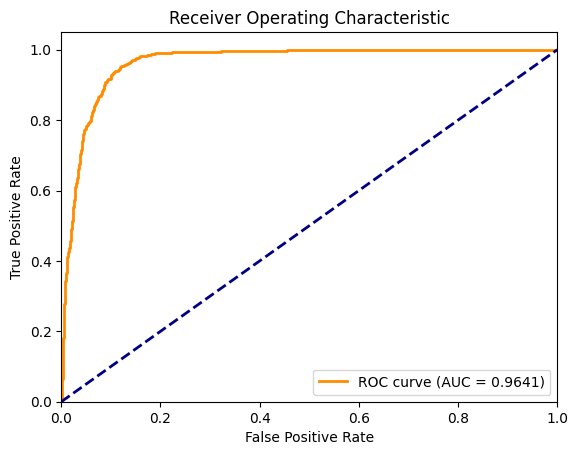

In [139]:
y_pred_proba = sgd_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **AdaBoost**

In [142]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)  # Shallow tree
ada_model = AdaBoostClassifier(
    estimator=base_estimator,  # Use 'estimator' instead of 'base_estimator'
    n_estimators=50,           # Number of boosting iterations
    learning_rate=1.0,         # Learning rate
    random_state=42            # Seed for random number generator
)
ada_model.fit(x_train, y_train)

# Predict on the test set
y_pred = ada_model.predict(x_test)

In [143]:
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9577    0.8803    0.9174      2005
           1     0.8866    0.9601    0.9219      1955

    accuracy                         0.9197      3960
   macro avg     0.9222    0.9202    0.9196      3960
weighted avg     0.9226    0.9197    0.9196      3960



In [144]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9197
Precision: 0.8866
Recall: 0.9601
F1 Score: 0.9219
Specificity: 0.8803
Cohen's Kappa: 0.8395
Matthews Correlation Coefficient (MCC): 0.8424


AUC: 0.9641


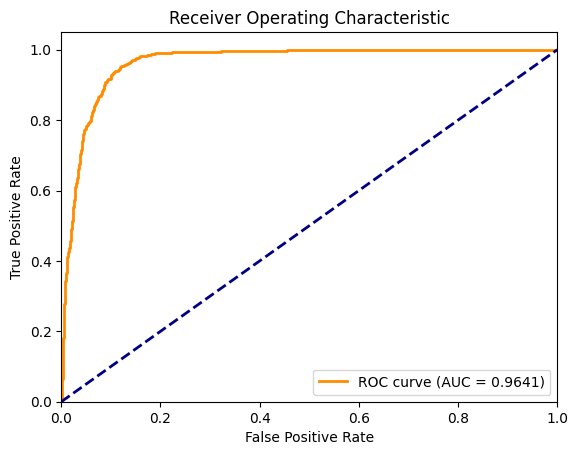

In [145]:
y_pred_proba = sgd_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **LSTM**

In [151]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import LSTM, Dense, Dropout 
time_steps = 1
xtrain_reshaped = np.reshape(x_train, (x_train.shape[0], time_steps, x_train.shape[1]))
xtest_reshaped = np.reshape(x_test, (x_test.shape[0], time_steps, x_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=5, activation='relu', input_shape=(time_steps, xtrain_reshaped.shape[2])))
Dropout(0.5),
LSTM(64),
Dropout(0.5),
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(xtrain_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
231/231 [==============================] - 3s 5ms/step - loss: 1.0067 - accuracy: 0.7628 - val_loss: 0.5995 - val_accuracy: 0.8501
Epoch 2/30
231/231 [==============================] - 1s 4ms/step - loss: 0.7411 - accuracy: 0.8334 - val_loss: 0.6546 - val_accuracy: 0.8306
Epoch 3/30
231/231 [==============================] - 1s 3ms/step - loss: 0.7204 - accuracy: 0.8284 - val_loss: 0.5065 - val_accuracy: 0.8642
Epoch 4/30
231/231 [==============================] - 1s 3ms/step - loss: 0.6501 - accuracy: 0.8498 - val_loss: 0.4827 - val_accuracy: 0.8550
Epoch 5/30
231/231 [==============================] - 1s 3ms/step - loss: 0.6108 - accuracy: 0.8325 - val_loss: 0.4453 - val_accuracy: 0.8680
Epoch 6/30
231/231 [==============================] - 1s 3ms/step - loss: 0.5876 - accuracy: 0.8697 - val_loss: 0.4429 - val_accuracy: 0.8961
Epoch 7/30
231/231 [==============================] - 1s 3ms/step - loss: 0.5969 - accuracy: 0.8701 - val_loss: 0.4389 - val_accuracy: 0.8945
Epoch 

124/124 [==============================] - 0s 2ms/step
Accuracy: 0.9376
Precision: 0.9274
Recall: 0.9478
F1 Score: 0.9375
Specificity: 0.9277
Cohen's Kappa: 0.8753
Matthews Correlation Coefficient (MCC): 0.8755


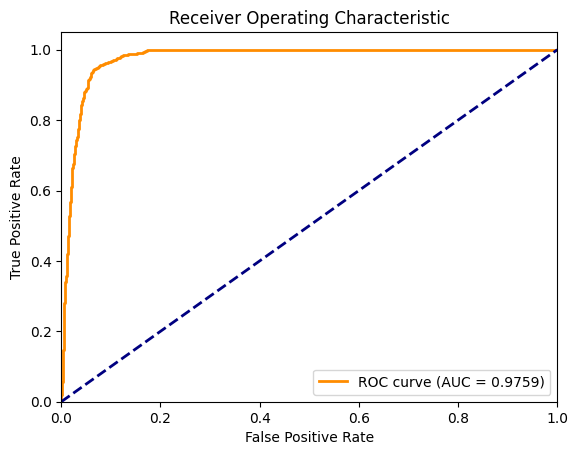

Confusion Matrix:
TN: 1860, FP: 145, FN: 102, TP: 1853


In [153]:
y_pred_proba = model.predict(xtest_reshaped).flatten()  # Probabilities for the positive class
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's Kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Calculate and plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print confusion matrix
print(f"Confusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# **GRU**

In [154]:
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.models import Sequential
import numpy as np

time_steps = 1
xtrain_reshaped = np.reshape(x_train, (x_train.shape[0], time_steps, x_train.shape[1]))
xtest_reshaped = np.reshape(x_test, (x_test.shape[0], time_steps, x_test.shape[1]))

# Define the GRU model
model = Sequential()
model.add(GRU(units=64, activation='relu', return_sequences=True, input_shape=(time_steps, xtrain_reshaped.shape[2])))
model.add(Dropout(0.5))
model.add(GRU(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xtrain_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
231/231 [==============================] - 5s 7ms/step - loss: 0.3567 - accuracy: 0.8530 - val_loss: 0.2292 - val_accuracy: 0.8999
Epoch 2/30
231/231 [==============================] - 1s 5ms/step - loss: 0.2564 - accuracy: 0.9024 - val_loss: 0.1811 - val_accuracy: 0.9205
Epoch 3/30
231/231 [==============================] - 1s 5ms/step - loss: 0.2161 - accuracy: 0.9202 - val_loss: 0.1532 - val_accuracy: 0.9475
Epoch 4/30
231/231 [==============================] - 1s 5ms/step - loss: 0.1895 - accuracy: 0.9325 - val_loss: 0.1317 - val_accuracy: 0.9562
Epoch 5/30
231/231 [==============================] - 1s 5ms/step - loss: 0.1690 - accuracy: 0.9429 - val_loss: 0.1176 - val_accuracy: 0.9654
Epoch 6/30
231/231 [==============================] - 1s 5ms/step - loss: 0.1507 - accuracy: 0.9490 - val_loss: 0.1004 - val_accuracy: 0.9681
Epoch 7/30
231/231 [==============================] - 1s 5ms/step - loss: 0.1412 - accuracy: 0.9539 - val_loss: 0.0864 - val_accuracy: 0.9735
Epoch 

124/124 [==============================] - 1s 3ms/step
Accuracy: 0.9864
Precision: 0.9731
Recall: 1.0000
F1 Score: 0.9864
Specificity: 0.9731
Cohen's Kappa: 0.9727
Matthews Correlation Coefficient (MCC): 0.9731


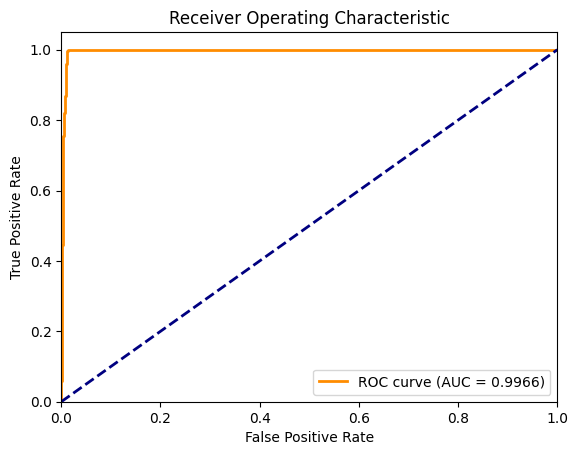

Confusion Matrix:
TN: 1951, FP: 54, FN: 0, TP: 1955


In [155]:
y_pred_proba = model.predict(xtest_reshaped).flatten()  # Probabilities for the positive class
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's Kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Calculate and plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print confusion matrix
print(f"Confusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('RF', rf_model),
    ('cat', catboost_model)
], voting='soft')  # Use 'soft' voting for probabilities

# Fit the ensemble model on training data
ensemble_model.fit(x_train, y_train)

# Predict on test data
ensemble_predictions = ensemble_model.predict(x_test)



0:	total: 28.7ms	remaining: 7m 10s
1:	total: 47.7ms	remaining: 5m 57s
2:	total: 65.8ms	remaining: 5m 28s
3:	total: 84.7ms	remaining: 5m 17s
4:	total: 103ms	remaining: 5m 9s
5:	total: 121ms	remaining: 5m 3s
6:	total: 141ms	remaining: 5m 1s
7:	total: 159ms	remaining: 4m 58s
8:	total: 177ms	remaining: 4m 54s
9:	total: 195ms	remaining: 4m 52s
10:	total: 213ms	remaining: 4m 49s
11:	total: 231ms	remaining: 4m 49s
12:	total: 251ms	remaining: 4m 49s
13:	total: 269ms	remaining: 4m 47s
14:	total: 286ms	remaining: 4m 45s
15:	total: 303ms	remaining: 4m 43s
16:	total: 321ms	remaining: 4m 43s
17:	total: 339ms	remaining: 4m 42s
18:	total: 357ms	remaining: 4m 41s
19:	total: 375ms	remaining: 4m 40s
20:	total: 393ms	remaining: 4m 40s
21:	total: 411ms	remaining: 4m 39s
22:	total: 428ms	remaining: 4m 38s
23:	total: 448ms	remaining: 4m 39s
24:	total: 465ms	remaining: 4m 38s
25:	total: 482ms	remaining: 4m 37s
26:	total: 499ms	remaining: 4m 36s
27:	total: 517ms	remaining: 4m 36s
28:	total: 534ms	remaining: 4

### DECISION_TREE_MODEL 

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt_model = DecisionTreeClassifier()


In [ ]:
from sklearn.model_selection import GridSearchCV



In [ ]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40]
}

In [ ]:
grid_search = GridSearchCV(dt_model, params, cv = 5 )

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print(grid_search.best_params_)


In [ ]:
print(grid_search.best_score_)

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 30)

In [ ]:
dt_model.fit(x_train, y_train)


In [ ]:
dt_pred = dt_model.predict(x_test)


In [ ]:
dt_pred

In [ ]:
train_dt_pred = dt_model.predict(x_train)


In [ ]:
print("Testing Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_test, dt_pred))

In [ ]:
print("Training Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_train, train_dt_pred))

### THANKS FOR VISITING 
### UPVOTES AND COMMENTS TO KEEP GOING 